<a href="https://colab.research.google.com/github/tutalae/DSE4/blob/main/Project_1_DSE4_Data_Analytic_Cleaned_data_V0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
DF1 = pd.read_csv("https://raw.githubusercontent.com/tutalae/DSE4/main/metadata_consumer-insight-survey2019.csv")
DF2 = pd.read_csv("https://raw.githubusercontent.com/tutalae/DSE4/main/dataset_consumer-insight-survey2019.csv")
DF_dict = pd.read_csv("https://raw.githubusercontent.com/tutalae/DSE4/main/data_dictionary_consumer-insight-survey2019.csv")

In [3]:
DF2.shape

(2059, 200)

In [4]:
DF_dict.shape

(193, 3)

In [5]:
DF_dictT= DF_dict.copy().T
DF_dictT.shape

(3, 193)

In [6]:
#DF_dictT.reset_index(inplace=True)
#DF_dictT.drop(columns = "index")
DF_dictT.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192
รหัส,a1,a2,a301,a302,a3021,a4,a5,a51,a52,a53,a54,a57,a58,a6,a7,a81,a82,a91,a92,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,l1,p1,p2,p3,p4,p5,p501,p6,q1,q2,q3,...,s12new,t12new,u12new,r13new,s13new,t13new,u13new,r14new,s14new,t14new,u14new,r15new,s15new,t15new,u15new,r16new,s16new,t16new,u16new,r17new,s17new,t17new,u17new,r18new,s18new,t18new,u18new,r19new,s19new,t19new,u19new,r20new,s20new,t20new,u20new,G_genZ,G_genY,G_genX,G_genB,Gen_group
ข้อคำถาม,a1 เพศ,a2 ปีเกิด (พ.ศ.),a301 สถานะทางการศึกษา,a302 ระดับการศึกษา,a3021 อื่น ๆ ระบบ ได้แก่,a4ท่านเป็นบุคคลที่จบปริญญาตรีและเพิ่งเริ่มทำงา...,a5 อาชีพ,a51 รับราชการ/พนักงานของรัฐหรือรัฐวิสาหกิจ สัง...,a52 พนักงานเอกชน/ลูกจ้างบริษัท ทำงานด้าน …,a53 เจ้าของธุรกิจ เกี่ยวกับ.……,a54 อาชีพอิสระ/ฟรีแลนซ์/รับจ้าง ทำงานด้าน ..,a57 เกษตรกร เช่น ทำไร่ ประมง ฯลฯ (ระบุ) ……,a58 อื่นๆ (ระบุ)………,a6 รายได้ของท่านเฉลี่ยต่อเดือน,a7ในกรณีที่เป็นนักเรียน/นักศึกษา.. ประมาณเท่าไ...,a81 สถานภาพส่วนตัว,a82 ลักษณะการอยู่อาศัย,a91 ภูมิภาคที่ท่านอาศัยอยู่ในปัจจุบัน,a92 ภูมิภาคและเขตพื้นที่ ที่ท่านอาศัยอยู่ในปัจ...,k1ติดตามข่าวในช่วงเช้าตรู่,k2ติดตามข่าวในช่วงเช้า,k3ติดตามข่าวในช่วงสาย,k4ติดตามข่าวในช่วงกลางวัน,k5ติดตามข่าวในช่วงบ่าย,k6ติดตามข่าวในช่วงเย็น,k7ติดตามข่าวในช่วงค่ำ,k8ติดตามข่าวในช่วงดึก,k9ติดตามข่าวในช่วงดึกจนล่วงเข้าวันใหม่,k10ติดตามข่าวในทุกช่วงเวลา,l11ท่านติดตามข่าวทางเครื่องรับโทรทัศน์ โดยรวมเ...,p1ท่านใช้อินเทอร์เน็ตในลักษณะใช้แพคเกจอินเทอร์...,p2ท่านใช้อินเทอร์เน็ตในลักษณะใช้แพคเกจอินเทอร์...,p3ท่านใช้อินเทอร์เน็ตในลักษณะใช้ Wi-Fi ที่บ้าน,p4ท่านใช้อินเทอร์เน็ตในลักษณะใช้ Free Wi-Fi ใน...,p5ท่านใช้อินเทอร์เน็ตในลักษณะใช้แบบอื่นๆ,p501ใช้แบบอื่นๆ (ระบุ) ……ได้แก่,p6ท่านใช้อินเทอร์เน็ตในลักษณะไม่ได้ใช้งานอินเท...,q1,q2สื่อออนไลน์ที่ท่านใช้งานเพื่อติดตามข่าว มีสื...,q3สื่อออนไลน์ที่ท่านใช้งานเพื่อติดตามข่าว มีสื...,...,s12new ทีมงานช่วยแนะนำ ข่าวเทคโนโลยี,t12new ติดตามไม่ติดตามทีวี,u12new ติดตามไม่ติดตามออนไลน์,r13new RD ระบุอันดับ ข่าวการศึกษา,s13new ทีมงานช่วยแนะนำ ข่าวการศึกษา,t13new ติดตามไม่ติดตามทีวี,u13new ติดตามไม่ติดตามออนไลน์,r14new RD ระบุอันดับ ข่าวสาธารณสุขการแพทย์,s14new ทีมงานช่วยแนะนำ ข่าวสาธารณสุขการแพทย์,t14new ติดตามไม่ติดตามทีวี,u14new ติดตามไม่ติดตามออนไลน์,r15new RD ระบุอันดับ ข่าวพยากรณ์อากาศ,s15new ทีมงานช่วยแนะนำ ข่าวพยากรณ์อากาศ,t15new ติดตามไม่ติดตามทีวี,u15new ติดตามไม่ติดตามออนไลน์,r16new RD ระบุอันดับ ข่าวจราจร,s16new ทีมงานช่วยแนะนำ ข่าวจราจร,t16neww ติดตามไม่ติดตามทีวี,u16neww ติดตามไม่ติดตามออนไลน์,r17neww RD ระบุอันดับ ข่าวสิ่งแวดล้อม,s17neww ทีมงานช่วยแนะนำ ข่าวสิ่งแวดล้อม,t17neww ติดตามไม่ติดตามทีวี,u17neww ติดตามไม่ติดตามออนไลน์,r18neww RD ระบุอันดับ ข่าวร้องทุกข์ชาวบ้าน,s18neww ทีมงานช่วยแนะนำ ข่าวร้องทุกข์ชาวบ้าน,t18neww ติดตามไม่ติดตามทีวี,u18neww ติดตามไม่ติดตามออนไลน์,r19new RD ระบุอันดับ ข่าวประชาชนรายงาน,s19new ทีมงานช่วยแนะนำ ข่าวประชาชนรายงาน,t19new ติดตามไม่ติดตามทีวี,u19new ติดตามไม่ติดตามออนไลน์,r20new RD ระบุอันดับ ข่าวอื่นๆระบุ,s20new ทีมงานช่วยแนะนำ ข่าวประชาชนรายงาน,t20new ติดตามไม่ติดตามทีวี,u20new ติดตามไม่ติดตามออนไลน์,อายุ 13 - 19 ปี,อายุ 20 - 37 ปี,อายุ 38 - 52 ปี,อายุ 53 - 72 ปี,NaN
code ตัวเลข,1=ชาย 2=หญิง,NaN,1=กำลังศึกษาอยู่ 2=จบการศึกษาแล้ว,1=ประถมศึกษา 2=มัธยมศึกษาตอนต้น 3=มัธยมศึกษา...,NaN,1=ใช่ 2=ไม่ใช่,1= รับราชการ/พนักงานของรัฐหรือรัฐวิสาหกิจ สังก...,1=การไฟฟ้าภูมิภาค 2=สำนักงานเขต 3=TOT 4=กระ...,1=ผู้จัดการ 2=ธรุการ 3=รปภ 4=แม่บ้าน(ทำความ...,1=รับทำบัญชี 2=ขายอาหารตามสั่ง/ก๋วยเตี๋ยว 3=...,1=บริการร้านกาแฟ/ขายกาแฟ 2=รับจ้างทั่วไป 3=ช...,1=ทำนา 2=เลี้ยงสัตว์,NaN,"1=ไม่เกิน 15,000 บาท 2=15,001 - 30,000 บาท 3=...",NaN,1=โสด (ไม่มีแฟน ไม่มีลูก) 2=มีแฟน/คนรัก 3=สา...,1=อยู่คนเดียว 2=อยู่กับครอบครัว 3=อยู่กับเพื...,1=กรุงเทพฯและปริมณฑล 2=ภาคเหนือ 3=ภาคตะวันออ...,1=ในเขตเทศบาล 2=นอกเขตเทศบาล,0=ไม่ใช่ 1=ใช่,0=ไม่ใช่ 1=ใช่,0=ไม่ใช่ 1=ใช่,0=ไม่ใช่ 1=ใช่,0=ไม่ใช่ 1=ใช่,0=ไม่ใช่ 1=ใช่,0=

In [7]:
DF_dictT.iloc[1,160]

'r14new RD ระบุอันดับ ข่าวสาธารณสุขการแพทย์'

In [8]:
List1 = list(DF2.columns)
List2 = list(DF_dictT.loc["รหัส"])
list(set(List1) - set(List2))

['j2', 'j3', 'filter_$', 'j5', 'j1', 'j4', 'id']

In [9]:
DF2.head()

,id,a1,a2,a301,a302,a3021,a4,a5,a51,a52,a53,a54,a57,a58,a6,a7,a81,a82,a91,a92,j1,j2,j3,j4,j5,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,l1,p1,p2,p3,p4,...,s12new,t12new,u12new,r13new,s13new,t13new,u13new,r14new,s14new,t14new,u14new,r15new,s15new,t15new,u15new,r16new,s16new,t16new,u16new,r17new,s17new,t17new,u17new,r18new,s18new,t18new,u18new,r19new,s19new,t19new,u19new,r20new,s20new,t20new,u20new,G_genZ,G_genY,G_genX,G_genB,Gen_group
0,1,1,2530,2,6.0,NaN,2,7,NaN,NaN,NaN,NaN,1.0,NaN,9.0,NaN,1,2,5,2.0,3,4,5,9,9,0,1,0,0,0,1,0,0,0,0,6,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2.0,NaN,NaN,2.0
1,2,2,2529,2,6.0,NaN,2,4,NaN,NaN,6.0,NaN,NaN,NaN,2.0,NaN,3,2,5,2.0,3,4,5,9,9,0,1,0,0,0,1,1,0,0,0,6,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2.0,NaN,NaN,2.0
2,3,2,2531,2,6.0,NaN,2,4,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,1,2,5,2.0,3,4,5,9,9,0,1,0,0,0,1,1,0,0,0,6,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2.0,NaN,NaN,2.0
3,4,2,2516,2,5.0,NaN,2,2,NaN,6.0,NaN,NaN,NaN,NaN,2.0,NaN,1,2,5,2.0,1,3,4,5,9,0,1,0,0,1,1,0,0,0,0,5,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,3.0,NaN,3.0
4,5,2,2508,2,1.0,NaN,2,6,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,4,2,5,2.0,1,3,5,9,9,0,1,0,1,0,1,1,0,0,0,6,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4.0,4.0


In [10]:
index_no = DF2.columns.get_loc('filter_$')
index_no

91

In [11]:
DF2_drop = DF2.drop(columns=['j5', 'filter_$', 'j2', 'j3', 'j1', 'j4', 'id'])
DF2_drop.head()

,a1,a2,a301,a302,a3021,a4,a5,a51,a52,a53,a54,a57,a58,a6,a7,a81,a82,a91,a92,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,l1,p1,p2,p3,p4,p5,p501,p6,q1,q2,q3,...,s12new,t12new,u12new,r13new,s13new,t13new,u13new,r14new,s14new,t14new,u14new,r15new,s15new,t15new,u15new,r16new,s16new,t16new,u16new,r17new,s17new,t17new,u17new,r18new,s18new,t18new,u18new,r19new,s19new,t19new,u19new,r20new,s20new,t20new,u20new,G_genZ,G_genY,G_genX,G_genB,Gen_group
0,1,2530,2,6.0,NaN,2,7,NaN,NaN,NaN,NaN,1.0,NaN,9.0,NaN,1,2,5,2.0,0,1,0,0,0,1,0,0,0,0,6,1,1,1,0,0,0,0,1,3,4,...,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2.0,NaN,NaN,2.0
1,2,2529,2,6.0,NaN,2,4,NaN,NaN,6.0,NaN,NaN,NaN,2.0,NaN,3,2,5,2.0,0,1,0,0,0,1,1,0,0,0,6,1,1,1,0,0,0,0,1,3,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2.0,NaN,NaN,2.0
2,2,2531,2,6.0,NaN,2,4,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,1,2,5,2.0,0,1,0,0,0,1,1,0,0,0,6,1,1,1,0,0,0,0,1,3,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2.0,NaN,NaN,2.0
3,2,2516,2,5.0,NaN,2,2,NaN,6.0,NaN,NaN,NaN,NaN,2.0,NaN,1,2,5,2.0,0,1,0,0,1,1,0,0,0,0,5,1,1,1,0,0,0,0,1,3,4,...,0,0,0,0,0,0,0,0,0,0,0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,3.0,NaN,3.0
4,2,2508,2,1.0,NaN,2,6,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,4,2,5,2.0,0,1,0,1,0,1,1,0,0,0,6,1,1,1,0,0,0,0,1,3,99,...,0,0,0,0,0,0,0,0,0,0,0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4.0,4.0


In [12]:
indexs = DF_dictT.loc["ข้อคำถาม"]

In [13]:
DF_main = DF2_drop.T.set_index(indexs)
DF_main = DF_main.T

In [14]:
DF_main.head()

ข้อคำถาม,a1 เพศ,a2 ปีเกิด (พ.ศ.),a301 สถานะทางการศึกษา,a302 ระดับการศึกษา,a3021 อื่น ๆ ระบบ ได้แก่,a4ท่านเป็นบุคคลที่จบปริญญาตรีและเพิ่งเริ่มทำงานไม่เกิน 4 ปี ....หรือไม่,a5 อาชีพ,a51 รับราชการ/พนักงานของรัฐหรือรัฐวิสาหกิจ สังกัด……,a52 พนักงานเอกชน/ลูกจ้างบริษัท ทำงานด้าน …,a53 เจ้าของธุรกิจ เกี่ยวกับ.……,a54 อาชีพอิสระ/ฟรีแลนซ์/รับจ้าง ทำงานด้าน ..,a57 เกษตรกร เช่น ทำไร่ ประมง ฯลฯ (ระบุ) ……,a58 อื่นๆ (ระบุ)………,a6 รายได้ของท่านเฉลี่ยต่อเดือน,a7ในกรณีที่เป็นนักเรียน/นักศึกษา.. ประมาณเท่าไร (ระบุ) ………………………. บาท,a81 สถานภาพส่วนตัว,a82 ลักษณะการอยู่อาศัย,a91 ภูมิภาคที่ท่านอาศัยอยู่ในปัจจุบัน,a92 ภูมิภาคและเขตพื้นที่ ที่ท่านอาศัยอยู่ในปัจจุบัน,k1ติดตามข่าวในช่วงเช้าตรู่,k2ติดตามข่าวในช่วงเช้า,k3ติดตามข่าวในช่วงสาย,k4ติดตามข่าวในช่วงกลางวัน,k5ติดตามข่าวในช่วงบ่าย,k6ติดตามข่าวในช่วงเย็น,k7ติดตามข่าวในช่วงค่ำ,k8ติดตามข่าวในช่วงดึก,k9ติดตามข่าวในช่วงดึกจนล่วงเข้าวันใหม่,k10ติดตามข่าวในทุกช่วงเวลา,l11ท่านติดตามข่าวทางเครื่องรับโทรทัศน์ โดยรวมเฉลี่ยต่อวันเป็นระยะเวลาเท่าใด,p1ท่านใช้อินเทอร์เน็ตในลักษณะใช้แพคเกจอินเทอร์เน็ตแบบจำกัดจำนวนชั่วโมง,p2ท่านใช้อินเทอร์เน็ตในลักษณะใช้แพคเกจอินเทอร์เน็ตแบบไม่จำกัดจำนวนชั่วโมง,p3ท่านใช้อินเทอร์เน็ตในลักษณะใช้ Wi-Fi ที่บ้าน,p4ท่านใช้อินเทอร์เน็ตในลักษณะใช้ Free Wi-Fi ในที่สาธารณะ หรือที่ทำงาน,p5ท่านใช้อินเทอร์เน็ตในลักษณะใช้แบบอื่นๆ,p501ใช้แบบอื่นๆ (ระบุ) ……ได้แก่,p6ท่านใช้อินเทอร์เน็ตในลักษณะไม่ได้ใช้งานอินเทอร์เน็ต,q1,q2สื่อออนไลน์ที่ท่านใช้งานเพื่อติดตามข่าว มีสื่อใดบ้าง โปรดจัดลำดับความนิยม อันดับ 2,q3สื่อออนไลน์ที่ท่านใช้งานเพื่อติดตามข่าว มีสื่อใดบ้าง โปรดจัดลำดับความนิยม อันดับ 3,...,s12new ทีมงานช่วยแนะนำ ข่าวเทคโนโลยี,t12new ติดตามไม่ติดตามทีวี,u12new ติดตามไม่ติดตามออนไลน์,r13new RD ระบุอันดับ ข่าวการศึกษา,s13new ทีมงานช่วยแนะนำ ข่าวการศึกษา,t13new ติดตามไม่ติดตามทีวี,u13new ติดตามไม่ติดตามออนไลน์,r14new RD ระบุอันดับ ข่าวสาธารณสุขการแพทย์,s14new ทีมงานช่วยแนะนำ ข่าวสาธารณสุขการแพทย์,t14new ติดตามไม่ติดตามทีวี,u14new ติดตามไม่ติดตามออนไลน์,r15new RD ระบุอันดับ ข่าวพยากรณ์อากาศ,s15new ทีมงานช่วยแนะนำ ข่าวพยากรณ์อากาศ,t15new ติดตามไม่ติดตามทีวี,u15new ติดตามไม่ติดตามออนไลน์,r16new RD ระบุอันดับ ข่าวจราจร,s16new ทีมงานช่วยแนะนำ ข่าวจราจร,t16neww ติดตามไม่ติดตามทีวี,u16neww ติดตามไม่ติดตามออนไลน์,r17neww RD ระบุอันดับ ข่าวสิ่งแวดล้อม,s17neww ทีมงานช่วยแนะนำ ข่าวสิ่งแวดล้อม,t17neww ติดตามไม่ติดตามทีวี,u17neww ติดตามไม่ติดตามออนไลน์,r18neww RD ระบุอันดับ ข่าวร้องทุกข์ชาวบ้าน,s18neww ทีมงานช่วยแนะนำ ข่าวร้องทุกข์ชาวบ้าน,t18neww ติดตามไม่ติดตามทีวี,u18neww ติดตามไม่ติดตามออนไลน์,r19new RD ระบุอันดับ ข่าวประชาชนรายงาน,s19new ทีมงานช่วยแนะนำ ข่าวประชาชนรายงาน,t19new ติดตามไม่ติดตามทีวี,u19new ติดตามไม่ติดตามออนไลน์,r20new RD ระบุอันดับ ข่าวอื่นๆระบุ,s20new ทีมงานช่วยแนะนำ ข่าวประชาชนรายงาน,t20new ติดตามไม่ติดตามทีวี,u20new ติดตามไม่ติดตามออนไลน์,อายุ 13 - 19 ปี,อายุ 20 - 37 ปี,อายุ 38 - 52 ปี,อายุ 53 - 72 ปี,NaN
0,1,2530,2,6,NaN,2,7,NaN,NaN,NaN,NaN,1,NaN,9,NaN,1,2,5,2,0,1,0,0,0,1,0,0,0,0,6,1,1,1,0,0,0,0,1,3,4,...,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2,NaN,NaN,2
1,2,2529,2,6,NaN,2,4,NaN,NaN,6,NaN,NaN,NaN,2,NaN,3,2,5,2,0,1,0,0,0,1,1,0,0,0,6,1,1,1,0,0,0,0,1,3,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2,NaN,NaN,2
2,2,2531,2,6,NaN,2,4,NaN,NaN,NaN,2,NaN,NaN,2,NaN,1,2,5,2,0,1,0,0,0,1,1,0,0,0,6,1,1,1,0,0,0,0,1,3,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2,NaN,NaN,2
3,2,2516,2,5,NaN,2,2,NaN,6,NaN,NaN,NaN,NaN,2,NaN,1,2,5,2,0,1,0,0,1,1,0,0,0,0,5,1,1,1,0,0,0,0,1,3,4,...,0,0,0,0,0,0,0,0,0,0,0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,3,NaN,3
4,2,2508,2,1,NaN,2,6,NaN,NaN,NaN,NaN,1,NaN,1,NaN,4,2,5,2,0,1,0,1,0,1,1,0,0,0,6,1,1,1,0,0,0,0,1,3,99,...,0,0,0,0,0,0,0,0,0,0,0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4,4


In [15]:
DF_main.isna().sum()

ข้อคำถาม
a1 เพศ                         0
a2 ปีเกิด (พ.ศ.)               0
a301 สถานะทางการศึกษา          0
a302 ระดับการศึกษา             5
a3021 อื่น ๆ ระบบ ได้แก่    2059
                            ... 
อายุ 13 - 19 ปี             1577
อายุ 20 - 37 ปี             1525
อายุ 38 - 52 ปี             1518
อายุ 53 - 72 ปี             1557
NaN                            0
Length: 193, dtype: int64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0, 'female'), Text(0, 0, 'male')]

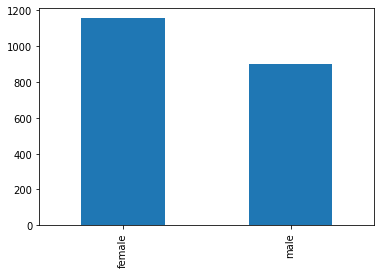

In [17]:
fig, ax = plt.subplots()
DF_main['a1 เพศ'].value_counts().plot.bar()
ax.set_xticklabels(["female" , "male"])


In [18]:
DF_main["อายุ"] = 2564 - DF_main["a2 ปีเกิด (พ.ศ.)"]
print(f"Min : ", DF_main["a2 ปีเกิด (พ.ศ.)"].min() , " Max : ", DF_main["a2 ปีเกิด (พ.ศ.)"].max()) 

Min :  2490  Max :  2549


In [19]:
DF_main[DF_main.columns[-2]]

0       2
1       2
2       2
3       3
4       4
       ..
2054    3
2055    4
2056    3
2057    3
2058    3
Name: nan, Length: 2059, dtype: object

'\n1 = Gen Z 2 = Gen Y 3 = Gen X 4 = Gen B\n'

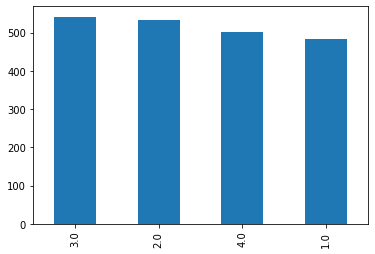

In [20]:
fig, ax = plt.subplots()
DF_main[DF_main.columns[-2]].value_counts().plot.bar()
"""
1 = Gen Z 2 = Gen Y 3 = Gen X 4 = Gen B
"""

'\n1=ประถมศึกษา  2=มัธยมศึกษาตอนต้น  3=มัธยมศึกษาตอนปลาย  4=ปวช.  \n5=ปวส./ปวท./อนุปริญญา  6=ปริญญาตรี  7=สูงกว่าปริญญาตรี  8=อื่น ๆ  9=ไม่ได้ศึกษาในระบบใดเลย\n'

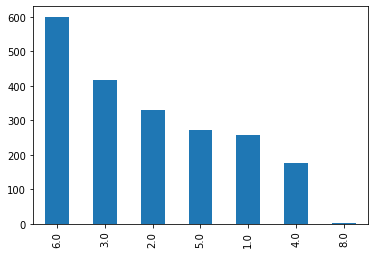

In [21]:
fig, ax = plt.subplots()
DF_main['a302 ระดับการศึกษา'].value_counts().plot.bar()
"""
1=ประถมศึกษา  2=มัธยมศึกษาตอนต้น  3=มัธยมศึกษาตอนปลาย  4=ปวช.  
5=ปวส./ปวท./อนุปริญญา  6=ปริญญาตรี  7=สูงกว่าปริญญาตรี  8=อื่น ๆ  9=ไม่ได้ศึกษาในระบบใดเลย
"""

'\n1= รับราชการ/พนักงานของรัฐหรือรัฐวิสาหกิจ สังกัด  \n2=พนักงานเอกชน/ลูกจ้างบริษัท 3=เจ้าของธุรกิจ  \n4=อาชีพอิสระ/ฟรีแลนซ์/รับจ้าง 5= นักเรียน/นักศึกษา     \n6= เกษียณอายุ/แม่บ้านพ่อบ้าน 7= เกษตรกร เช่น ทำไร่ ประมง ฯลฯ  \n8=อื่นๆ\n'

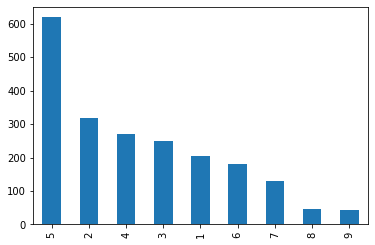

In [22]:
fig, ax = plt.subplots()
DF_main['a5 อาชีพ'].value_counts().plot.bar()
"""
1= รับราชการ/พนักงานของรัฐหรือรัฐวิสาหกิจ สังกัด  
2=พนักงานเอกชน/ลูกจ้างบริษัท 3=เจ้าของธุรกิจ  
4=อาชีพอิสระ/ฟรีแลนซ์/รับจ้าง 5= นักเรียน/นักศึกษา     
6= เกษียณอายุ/แม่บ้านพ่อบ้าน 7= เกษตรกร เช่น ทำไร่ ประมง ฯลฯ  
8=อื่นๆ
"""

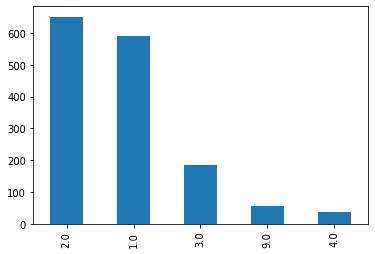

In [23]:
fig, ax = plt.subplots()
DF_main['a6 รายได้ของท่านเฉลี่ยต่อเดือน'].value_counts().plot.bar()

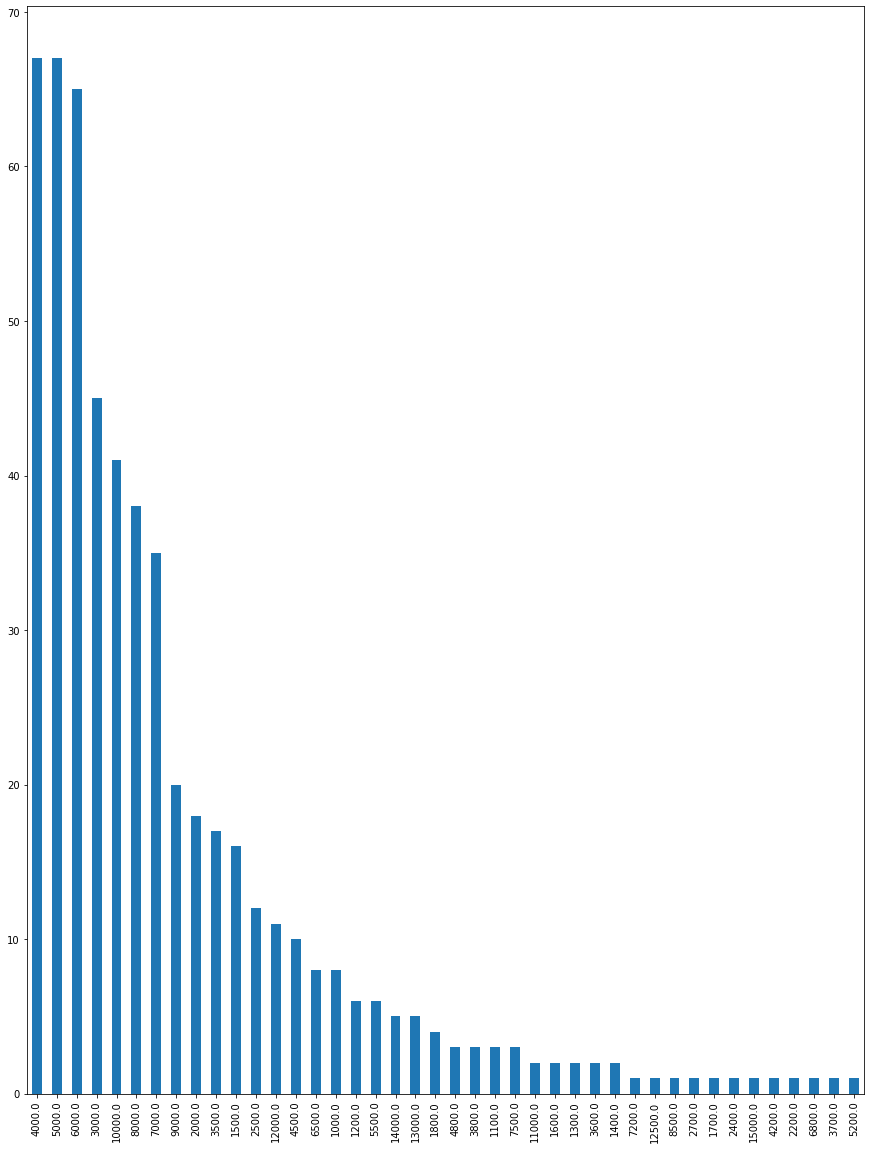

In [24]:
plt.figure(figsize=(15,20))
DF_main["a7ในกรณีที่เป็นนักเรียน/นักศึกษา.. ประมาณเท่าไร (ระบุ) ………………………. บาท"].value_counts().plot.bar()

In [25]:
print("รายได้เฉลี่ยนักศึกษาอยู่ที่ : ",DF_main["a7ในกรณีที่เป็นนักเรียน/นักศึกษา.. ประมาณเท่าไร (ระบุ) ………………………. บาท"].mean(), "บาท")

รายได้เฉลี่ยนักศึกษาอยู่ที่ :  5571.375464684015 บาท


'1=โสด (ไม่มีแฟน ไม่มีลูก)  2=มีแฟน/คนรัก  3=สามีหรือภรรยา แต่ยังไม่มีลูก  \n4=มีสามีหรือภรรยา และมีลูกแล้ว  5=ม่าย/หย่าร้าง  แต่ยังไม่มีลูก  \n6=ม่าย/หย่าร้าง และมีลูกแล้ว'

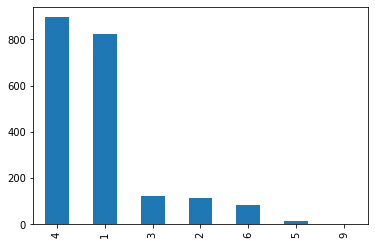

In [26]:
fig, ax = plt.subplots()
DF_main['a81 สถานภาพส่วนตัว'].value_counts().plot.bar()
"""1=โสด (ไม่มีแฟน ไม่มีลูก)  2=มีแฟน/คนรัก  3=สามีหรือภรรยา แต่ยังไม่มีลูก  
4=มีสามีหรือภรรยา และมีลูกแล้ว  5=ม่าย/หย่าร้าง  แต่ยังไม่มีลูก  
6=ม่าย/หย่าร้าง และมีลูกแล้ว"""

'\n1=อยู่คนเดียว  2=อยู่กับครอบครัว  3=อยู่กับเพื่อน  4=อยู่กับแฟน/คนรัก (โดยที่ยังไม่แต่งงาน)\n'

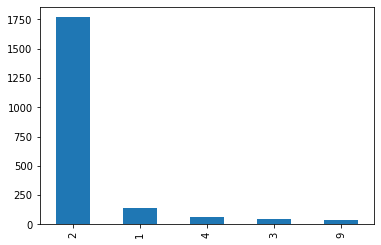

In [27]:
fig, ax = plt.subplots()
DF_main['a82 ลักษณะการอยู่อาศัย'].value_counts().plot.bar()
"""
1=อยู่คนเดียว  2=อยู่กับครอบครัว  3=อยู่กับเพื่อน  4=อยู่กับแฟน/คนรัก (โดยที่ยังไม่แต่งงาน)
"""

'\n1=กรุงเทพฯและปริมณฑล  2=ภาคเหนือ  3=ภาคตะวันออกเฉียงเหนือ  4=ภาคกลาง  5=ภาคใต้\n'

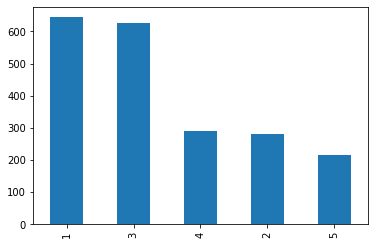

In [28]:
fig, ax = plt.subplots()
DF_main['a91 ภูมิภาคที่ท่านอาศัยอยู่ในปัจจุบัน'].value_counts().plot.bar()
"""
1=กรุงเทพฯและปริมณฑล  2=ภาคเหนือ  3=ภาคตะวันออกเฉียงเหนือ  4=ภาคกลาง  5=ภาคใต้
"""

In [29]:
DF_main.iloc

'\nk1ติดตามข่าวในช่วงเช้าตรู่\tk2ติดตามข่าวในช่วงเช้า\tk3ติดตามข่าวในช่วงสาย\t\nk4ติดตามข่าวในช่วงกลางวัน\tk5ติดตามข่าวในช่วงบ่าย\tk6ติดตามข่าวในช่วงเย็น\t\nk7ติดตามข่าวในช่วงค่ำ\tk8ติดตามข่าวในช่วงดึก\tk9ติดตามข่าวในช่วงดึกจนล่วงเข้าวันใหม่\t\nk10ติดตามข่าวในทุกช่วงเวลา\n'

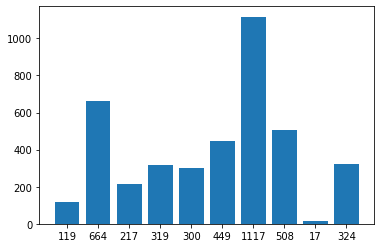

In [30]:
k1 = 0
for i in DF_main.iloc[:,19]:
  if i == 1:
    k1 += 1

k2 = 0
for i in DF_main.iloc[:,20]:
  if i == 1:
    k2 += 1

k3 = 0
for i in DF_main.iloc[:,21]:
  if i == 1:
    k3 += 1

k4 = 0
for i in DF_main.iloc[:,22]:
  if i == 1:
    k4 += 1

k5 = 0
for i in DF_main.iloc[:,23]:
  if i == 1:
    k5 += 1        

k6 = 0
for i in DF_main.iloc[:,24]:
  if i == 1:
    k6 += 1

k7 = 0
for i in DF_main.iloc[:,25]:
  if i == 1:
    k7 += 1
    
k8 = 0
for i in DF_main.iloc[:,26]:
  if i == 1:
    k8 += 1

k9 = 0
for i in DF_main.iloc[:,27]:
  if i == 1:
    k9 += 1

k10 = 0
for i in DF_main.iloc[:,28]:
  if i == 1:
    k10 += 1

time_list = [k1, k2, k3, k4, k5, k6, k7, k8, k9, k10]

fig, ax = plt.subplots()
plt.bar(range(10), time_list)

plt.xticks(range(10), time_list)
"""
k1ติดตามข่าวในช่วงเช้าตรู่	k2ติดตามข่าวในช่วงเช้า	k3ติดตามข่าวในช่วงสาย	
k4ติดตามข่าวในช่วงกลางวัน	k5ติดตามข่าวในช่วงบ่าย	k6ติดตามข่าวในช่วงเย็น	
k7ติดตามข่าวในช่วงค่ำ	k8ติดตามข่าวในช่วงดึก	k9ติดตามข่าวในช่วงดึกจนล่วงเข้าวันใหม่	
k10ติดตามข่าวในทุกช่วงเวลา
"""

'\nl11ท่านติดตามข่าวทางเครื่องรับโทรทัศน์ โดยรวมเฉลี่ยต่อวันเป็นระยะเวลาเท่าใด\n'

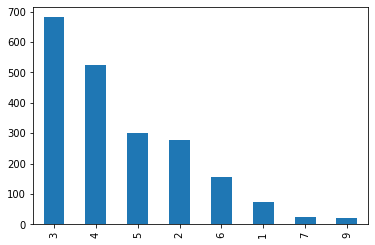

In [31]:
fig, ax = plt.subplots()
DF_main["l11ท่านติดตามข่าวทางเครื่องรับโทรทัศน์ โดยรวมเฉลี่ยต่อวันเป็นระยะเวลาเท่าใด"].value_counts().plot.bar()
"""
l11ท่านติดตามข่าวทางเครื่องรับโทรทัศน์ โดยรวมเฉลี่ยต่อวันเป็นระยะเวลาเท่าใด
"""

'\np1ท่านใช้อินเทอร์เน็ตในลักษณะใช้แพคเกจอินเทอร์เน็ตแบบจำกัดจำนวนชั่วโมง\t\np2ท่านใช้อินเทอร์เน็ตในลักษณะใช้แพคเกจอินเทอร์เน็ตแบบไม่จำกัดจำนวนชั่วโมง\t\np3ท่านใช้อินเทอร์เน็ตในลักษณะใช้ Wi-Fi ที่บ้าน\t\np4ท่านใช้อินเทอร์เน็ตในลักษณะใช้ Free Wi-Fi ในที่สาธารณะ หรือที่ทำงาน\t\np5ท่านใช้อินเทอร์เน็ตในลักษณะใช้แบบอื่นๆ\t\np6ท่านใช้อินเทอร์เน็ตในลักษณะไม่ได้ใช้งานอินเทอร์เน็ต\n'

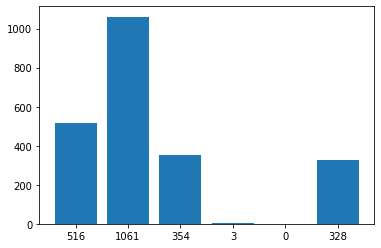

In [32]:
p1 = 0
for i in DF_main.iloc[:,30]:
  if i == 1:
    p1 += 1

p2 = 0
for i in DF_main.iloc[:,31]:
  if i == 1:
    p2 += 1

p3 = 0
for i in DF_main.iloc[:,33]:
  if i == 1:
    p3 += 1

p4 = 0
for i in DF_main.iloc[:,34]:
  if i == 1:
    p4 += 1

p5 = 0
for i in DF_main.iloc[:,35]:
  if i == 1:
    p5 += 1        

p6 = 0
for i in DF_main.iloc[:,36]:
  if i == 1:
    p6 += 1

internet_list = [p1, p2, p3, p4, p5, p6]

fig, ax = plt.subplots()
plt.bar(range(6), internet_list)

plt.xticks(range(6), internet_list)
"""
p1ท่านใช้อินเทอร์เน็ตในลักษณะใช้แพคเกจอินเทอร์เน็ตแบบจำกัดจำนวนชั่วโมง	
p2ท่านใช้อินเทอร์เน็ตในลักษณะใช้แพคเกจอินเทอร์เน็ตแบบไม่จำกัดจำนวนชั่วโมง	
p3ท่านใช้อินเทอร์เน็ตในลักษณะใช้ Wi-Fi ที่บ้าน	
p4ท่านใช้อินเทอร์เน็ตในลักษณะใช้ Free Wi-Fi ในที่สาธารณะ หรือที่ทำงาน	
p5ท่านใช้อินเทอร์เน็ตในลักษณะใช้แบบอื่นๆ	
p6ท่านใช้อินเทอร์เน็ตในลักษณะไม่ได้ใช้งานอินเทอร์เน็ต
"""

'\nq1 สื่อออนไลน์ที่ท่านใช้งานเพื่อติดตามข่าว มีสื่อใดบ้าง โปรดจัดลำดับความนิยม อันดับ 1\n\n1=Facebook  2=Twitter  3=YouTube  4=Instagram  \n5=LINE TODAY  6=LINE TV  7=Podcast / วิทยุออนไลน์  \n8=Pantip  9=เว็บไซต์ / แอปพลิเคชั่น  10=อื่นๆ\n'

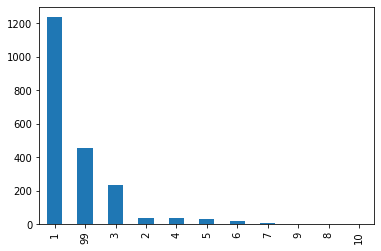

In [33]:
fig, ax = plt.subplots()
DF_main.iloc[:,37].value_counts().plot.bar()
"""
q1 สื่อออนไลน์ที่ท่านใช้งานเพื่อติดตามข่าว มีสื่อใดบ้าง โปรดจัดลำดับความนิยม อันดับ 1

1=Facebook  2=Twitter  3=YouTube  4=Instagram  
5=LINE TODAY  6=LINE TV  7=Podcast / วิทยุออนไลน์  
8=Pantip  9=เว็บไซต์ / แอปพลิเคชั่น  10=อื่นๆ
"""

'\nq2 สื่อออนไลน์ที่ท่านใช้งานเพื่อติดตามข่าว มีสื่อใดบ้าง โปรดจัดลำดับความนิยม อันดับ 2\n\n1=Facebook  2=Twitter  3=YouTube  4=Instagram  \n5=LINE TODAY  6=LINE TV  7=Podcast / วิทยุออนไลน์  \n8=Pantip  9=เว็บไซต์ / แอปพลิเคชั่น  10=อื่นๆ\n'

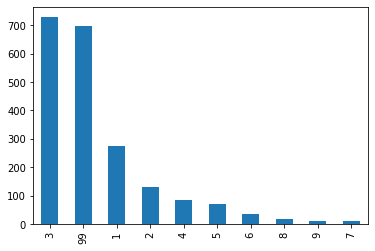

In [34]:
fig, ax = plt.subplots()
DF_main.iloc[:,38].value_counts().plot.bar()
"""
q2 สื่อออนไลน์ที่ท่านใช้งานเพื่อติดตามข่าว มีสื่อใดบ้าง โปรดจัดลำดับความนิยม อันดับ 2

1=Facebook  2=Twitter  3=YouTube  4=Instagram  
5=LINE TODAY  6=LINE TV  7=Podcast / วิทยุออนไลน์  
8=Pantip  9=เว็บไซต์ / แอปพลิเคชั่น  10=อื่นๆ
"""

'\nq3 สื่อออนไลน์ที่ท่านใช้งานเพื่อติดตามข่าว มีสื่อใดบ้าง โปรดจัดลำดับความนิยม อันดับ 3\n\n1=Facebook  2=Twitter  3=YouTube  4=Instagram  \n5=LINE TODAY  6=LINE TV  7=Podcast / วิทยุออนไลน์  \n8=Pantip  9=เว็บไซต์ / แอปพลิเคชั่น  10=อื่นๆ\n'

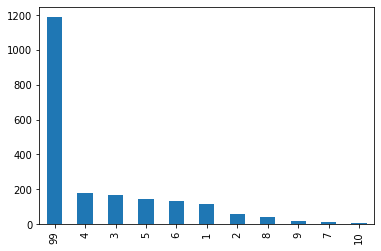

In [35]:
fig, ax = plt.subplots()
DF_main.iloc[:,39].value_counts().plot.bar()
"""
q3 สื่อออนไลน์ที่ท่านใช้งานเพื่อติดตามข่าว มีสื่อใดบ้าง โปรดจัดลำดับความนิยม อันดับ 3

1=Facebook  2=Twitter  3=YouTube  4=Instagram  
5=LINE TODAY  6=LINE TV  7=Podcast / วิทยุออนไลน์  
8=Pantip  9=เว็บไซต์ / แอปพลิเคชั่น  10=อื่นๆ
"""

'\nv1 ในสื่อทุกช่องทางที่ท่านใช้ติดตามข่าว ท่านจะมีติดตามเนื้อหาข่าวแบบใดมากที่สุด\n(เลือกเพียงข้อเดียว)\n\n1=ติดตามทุกข่าว  2=ติดตามเฉพาะข่าวที่ตนเองสนใจ  3=ติดตามเฉพาะข่าวที่อยู่ในกระแส  \n4=ติดตามเฉพาะข่าวที่ส่งผลต่อการดำเนินชีวิตของตัวเองและครอบครัว  5=อื่นๆ  ระบุ\n'

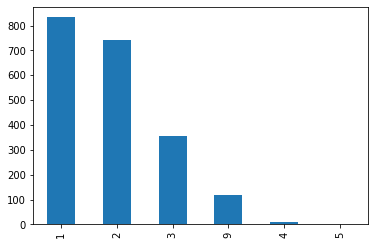

In [36]:
fig, ax = plt.subplots()
DF_main.iloc[:,76].value_counts().plot.bar()

"""
v1 ในสื่อทุกช่องทางที่ท่านใช้ติดตามข่าว ท่านจะมีติดตามเนื้อหาข่าวแบบใดมากที่สุด
(เลือกเพียงข้อเดียว)

1=ติดตามทุกข่าว  2=ติดตามเฉพาะข่าวที่ตนเองสนใจ  3=ติดตามเฉพาะข่าวที่อยู่ในกระแส  
4=ติดตามเฉพาะข่าวที่ส่งผลต่อการดำเนินชีวิตของตัวเองและครอบครัว  5=อื่นๆ  ระบุ
"""

'\nw1 ท่านมักติดตามข่าวในช่วงวันใดมากที่สุด\n\n1=จันทร์-ศุกร์  2=เสาร์-อาทิตย์/วันหยุด  3=ทุกวัน\n'

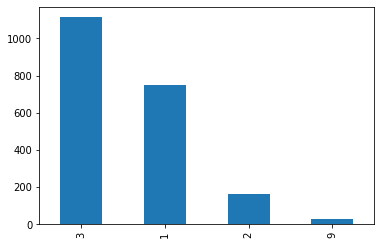

In [37]:
fig, ax = plt.subplots()
DF_main.iloc[:, 79].value_counts().plot.bar()

"""
w1 ท่านมักติดตามข่าวในช่วงวันใดมากที่สุด

1=จันทร์-ศุกร์  2=เสาร์-อาทิตย์/วันหยุด  3=ทุกวัน
"""

'\nx1 ท่านมักติดตามข่าว ที่บ้าน\tx2 ท่านมักติดตามข่าว สถานที่ทำงาน\t\nx3 ท่านมักติดตามข่าว บนยานพาหนะระหว่างเดินทาง\tx4 ท่านมักติดตามข่าว ไม่จำกัดสถานที่\t\nx5 อื่นๆ ระบุ\n'

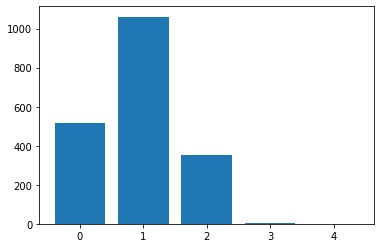

In [38]:
x1 = 0
for i in DF_main.iloc[:,30]:
  if i == 1:
    x1 += 1

x2 = 0
for i in DF_main.iloc[:,31]:
  if i == 1:
    x2 += 1

x3 = 0
for i in DF_main.iloc[:,33]:
  if i == 1:
    x3 += 1

x4 = 0
for i in DF_main.iloc[:,34]:
  if i == 1:
    x4 += 1

x5 = 0
for i in DF_main.iloc[:,35]:
  if i == 1:
    x5 += 1        

tnew_list = [x1, x2, x3, x4, x5]

fig, ax = plt.subplots()
plt.bar(range(5), tnew_list)

plt.xticks(range(5))
"""
x1 ท่านมักติดตามข่าว ที่บ้าน	x2 ท่านมักติดตามข่าว สถานที่ทำงาน	
x3 ท่านมักติดตามข่าว บนยานพาหนะระหว่างเดินทาง	x4 ท่านมักติดตามข่าว ไม่จำกัดสถานที่	
x5 อื่นๆ ระบุ
"""

In [40]:
"""\nk1ติดตามข่าวในช่วงเช้าตรู่\tk2ติดตามข่าวในช่วงเช้า\tk3ติดตามข่าวในช่วงสาย\t 
\nk4ติดตามข่าวในช่วงกลางวัน\tk5ติดตามข่าวในช่วงบ่าย
\tk6ติดตามข่าวในช่วงเย็น\t\nk7ติดตามข่าวในช่วงค่ำ\tk8ติดตามข่าวในช่วงดึก\tk9ติดตามข่าวในช่วงดึกจนล่วงเข้าวันใหม่\t
\nk10ติดตามข่าวในทุกช่วงเวลา\n"""

DF_period = pd.DataFrame()

DF_period["เช้า"] = DF_main.iloc[:,19] +DF_main.iloc[:,20] + DF_main.iloc[:,21]
DF_period["เที่ยง"]  = DF_main.iloc[:,22] +DF_main.iloc[:,23] 
DF_period["เย็น-ดึก"]  = DF_main.iloc[:,24] +DF_main.iloc[:,25] + DF_main.iloc[:,26] + DF_main.iloc[:,27]
DF_period["ตลอดเวลา"] = DF_main.iloc[:,28]

for i, t in enumerate(DF_period["เช้า"]):
  if t > 1:
    DF_period["เช้า"]
    DF_period["เช้า"][i] = 1

for i, t in enumerate(DF_period["เที่ยง"]):
  if t > 1:
    DF_period["เที่ยง"]
    DF_period["เที่ยง"][i] = 1

for i, t in enumerate(DF_period["เย็น-ดึก"]):
  if t > 1:
    DF_period["เย็น-ดึก"]
    DF_period["เย็น-ดึก"][i] = 1

DF_period
DFGen = DF_main[DF_main.columns[-2]]

periodxgen = DF_period.set_index(DFGen)
periodxgen.reset_index(inplace=True)
periodxgen.columns = ["gen","เช้า", "เที่ยง","ค่ำ", "ตลอดเวลา"]
periodxgen["gen"] = periodxgen["gen"].astype("int")
periodxgen.head()

,gen,เช้า,เที่ยง,ค่ำ,ตลอดเวลา
0,2,1,0,1,0
1,2,1,0,1,0
2,2,1,0,1,0
3,3,1,1,1,0
4,4,1,1,1,0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3594 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3657 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3594 missing from current font.
  font.set_text(s, 

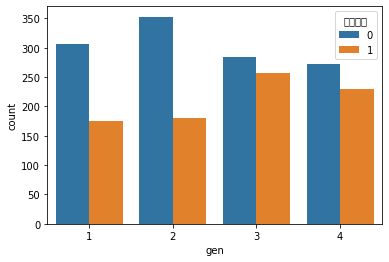

In [41]:
ax = sns.countplot(x="gen", hue="เช้า", data=periodxgen)

In [42]:
"""
อายุ 13 - 19 ปี,	อายุ 20 - 37 ปี,	อายุ 38 - 52 ปี,	อายุ 53 - 72 ปี
"""

'\nอายุ 13 - 19 ปี,\tอายุ 20 - 37 ปี,\tอายุ 38 - 52 ปี,\tอายุ 53 - 72 ปี\n'

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3607 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3637 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s

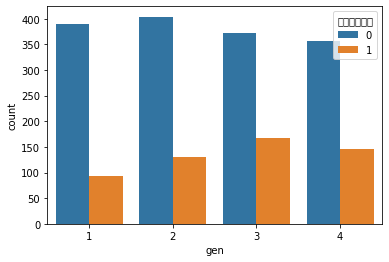

In [43]:
ax = sns.countplot(x="gen", hue="เที่ยง", data=periodxgen)

In [44]:
"""
อายุ 13 - 19 ปี,	อายุ 20 - 37 ปี,	อายุ 38 - 52 ปี,	อายุ 53 - 72 ปี
"""

'\nอายุ 13 - 19 ปี,\tอายุ 20 - 37 ปี,\tอายุ 38 - 52 ปี,\tอายุ 53 - 72 ปี\n'

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3635 missing from current font.
  font.set_text(s, 0,

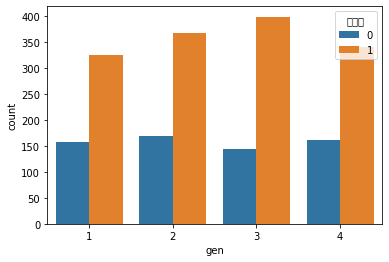

In [45]:
ax = sns.countplot(x="gen", hue="ค่ำ", data=periodxgen)

In [46]:
"""
อายุ 13 - 19 ปี,	อายุ 20 - 37 ปี,	อายุ 38 - 52 ปี,	อายุ 53 - 72 ปี
"""

'\nอายุ 13 - 19 ปี,\tอายุ 20 - 37 ปี,\tอายุ 38 - 52 ปี,\tอายุ 53 - 72 ปี\n'

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3605 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3621 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s

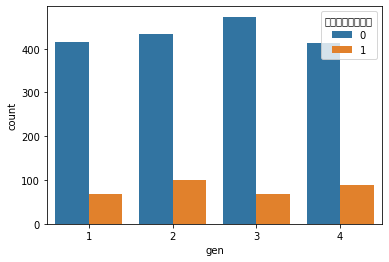

In [47]:
ax = sns.countplot(x="gen", hue="ตลอดเวลา", data=periodxgen)

In [48]:
"""
อายุ 13 - 19 ปี,	อายุ 20 - 37 ปี,	อายุ 38 - 52 ปี,	อายุ 53 - 72 ปี
"""

'\nอายุ 13 - 19 ปี,\tอายุ 20 - 37 ปี,\tอายุ 38 - 52 ปี,\tอายุ 53 - 72 ปี\n'

In [54]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

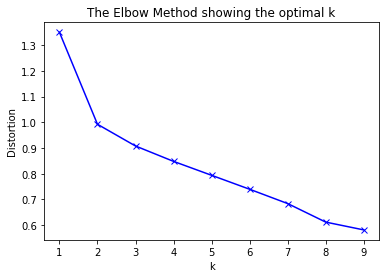

In [55]:
# try with 10 different values of k to find the best one
Ks = 10
distortions = []

for k in range(1, Ks):

    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(periodxgen)

    # find the distortion w.r.t each k
    distortions.append(
        sum(np.min(cdist(periodxgen, kmeans.cluster_centers_, 'euclidean'), axis=1))
        / periodxgen.shape[0]
    )

plt.plot(range(1, Ks), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [60]:
clus = KMeans(n_clusters=3, random_state=0).fit_predict(periodxgen)    # กำหนดให้แบ่งออกเป็น 6 กลุ่ม และ random state เมื่อต้องการให้สุ่มได้ข้อมูลชุดเดิม
periodxgen['prog_clus'] = clus
periodxgen.head()

,gen,เช้า,เที่ยง,ค่ำ,ตลอดเวลา,prog_clus
0,2,1,0,1,0,1
1,2,1,0,1,0,1
2,2,1,0,1,0,1
3,3,1,1,1,0,0
4,4,1,1,1,0,0


In [62]:
periodxgen[periodxgen["prog_clus"]==0].mean()
"อายุ 38 - 52 ปี,	อายุ 53 - 72 ปี"

gen          3.468326
เช้า         0.549774
เที่ยง       0.354072
ค่ำ          0.832579
ตลอดเวลา     0.002262
prog_clus    0.000000
dtype: float64

In [61]:
periodxgen[periodxgen["prog_clus"]==1].mean()
"อายุ 13 - 19 ปี,	อายุ 20 - 37 ปี"

gen          1.474946
เช้า         0.387800
เที่ยง       0.241830
ค่ำ          0.752723
ตลอดเวลา     0.076253
prog_clus    1.000000
dtype: float64

In [63]:
periodxgen[periodxgen["prog_clus"]==2].mean()
"อายุ 53 - 72 ปี"

gen          2.961089
เช้า         0.003891
เที่ยง       0.003891
ค่ำ          0.007782
ตลอดเวลา     0.980545
prog_clus    2.000000
dtype: float64

In [ ]:
DF_dictT.iloc[1, 97]

In [ ]:
DF_dictT.iloc[1, 79]
DF_main.iloc[:,97:107]

In [ ]:
DF_main.iloc[:,112:120]

In [ ]:
DF_main.iloc[:,120:130]

In [ ]:
DF_main.iloc[:,130:140]

In [ ]:
DF_main.iloc[:,140:150]

In [ ]:
DF_main.iloc[:,150:160]

In [ ]:
DF_main.iloc[:,160:170]

In [ ]:
DF_main.iloc[:,170:180]

In [ ]:
DF_main.iloc[:,180:190]

In [ ]:
DF_main.iloc[:,190:200]